# Device Image Masking and Patching

# Setup

In [1]:
import glob
from PIL import Image, ImageDraw
import cv2
from skimage.util.shape import view_as_blocks
from tqdm.auto import tqdm
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import numpy as np
from skimage import color as skcolor
from skimage import filters as skfilters
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
# Load the Drive helper and mount:
from google.colab import drive

# This will prompt for authorization:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/BETR_Summer23

/content/drive/MyDrive/BETR_Summer23


%cd drive/MyDrive/BETR_Summer23

In [ ]:
avg_dv = np.array([108.16076384,  61.49104917,  55.44175686])
color_correct = True
center = True
max_noise_level = 10000
stage_idx = {"Maturation":0,
             "Hemostasis":1,
             "Inflammatory":2,
             "Proliferation":3}
crop_size = 1024

## Create Filtered Whole Image Dataset
The following cells will mask an image, and depending on whether or not the amount of bright pixels is below a user defined threshold, the entire image will be marked as "good" and saved to a new training dataset directory.

In [ ]:
device_fns = glob.glob("data/exp13_ctl_sep2/exp13_ctl/*.jpg", recursive=True)
#device_fns = glob.glob("data/exp_ctls/test_13/*.jpg", recursive=True)
print(len(device_fns))

1102


In [ ]:
#mkdir data/clean_full_img
#!mkdir '/content/drive/MyDrive/BETR_Summer23/data/exp_test_4patch'

  0%|          | 0/602 [00:00<?, ?it/s]

1/1102: Found 0 images so far.


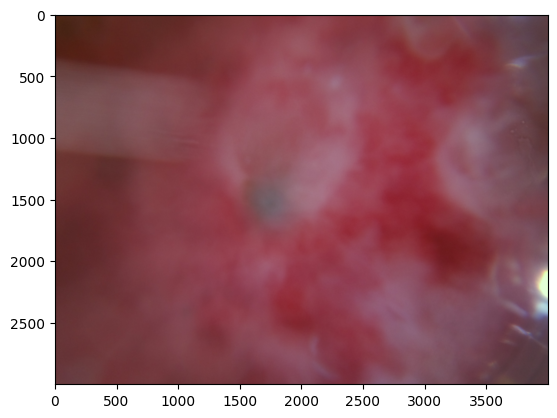

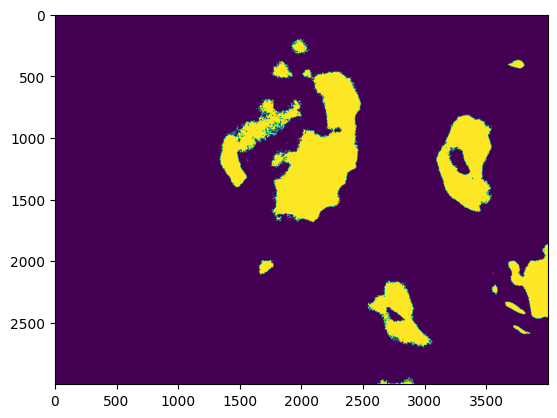

2/1102: Found 1 images so far.


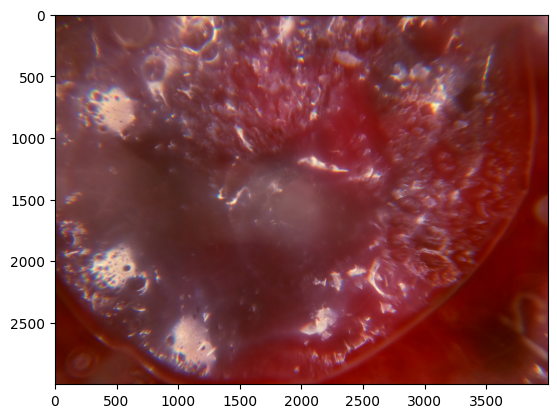

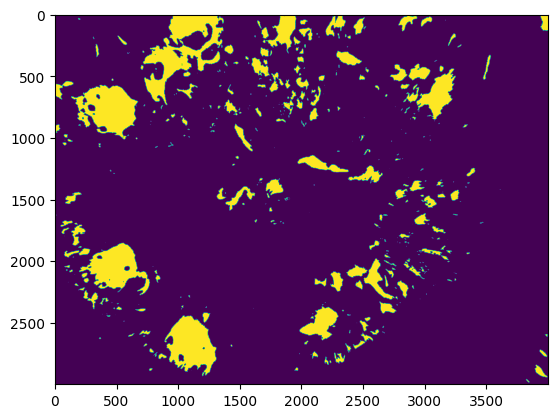

3/1102: Found 2 images so far.
4/1102: Found 2 images so far.
5/1102: Found 2 images so far.


KeyboardInterrupt: ignored

In [ ]:
# whole image; train m
goods = 0
base = '/content/drive/MyDrive/BETR_Summer23/data/Exp_ctl_sep2_3x4_cleaned/'
num_ = len(device_fns)
num_patches = {}
count = 0
goods = 0
imgs_good = []
for fn in tqdm(device_fns[500:]):
    # load
    device_image = img_to_array(Image.open(fn))

    # correct color
    if color_correct:
        img_avg = device_image.mean(axis=(0,1))
        device_image = np.clip(device_image +
                            np.expand_dims(avg_dv - img_avg, axis=0), 0, 255).astype(int)

    # Center Cropping
    if center:
        device_image = device_image[1000:4000, 1500:5500]


    #plt.imshow(device_image)
    #plt.show()
    # Find regions in the image that are too bright, by converting to RBG and using gaussian smoothinng
    gray = skcolor.rgb2gray(device_image/255)


    blurred_image = skfilters.gaussian(gray, sigma=1.0)
    #plt.imshow(gray)
    #plt.show()
    thresh = blurred_image > 0.4

    #plt.imshow(thresh)
    #plt.show()

    if np.count_nonzero(thresh) < int(3000*4000*0.1):
       #print(f"{fn.split('/')[-1]} {np.count_nonzero(thresh)/(3000*4000)}%")
        plt.imshow(device_image)
        plt.show()
        plt.imshow(thresh)
        plt.show()
        out_img = Image.fromarray(device_image.astype(np.uint8))

        #out_img.save(base + "/" + fn.split('/')[-1]) # Uncomment to save
        goods += 1
        imgs_good.append(fn)

    count += 1
    print(f"{count}/{num_}: Found {goods} images so far.")
    ctr = 0


print(f"{goods} images have at least 1 crop")

## Quadrant Patching
The following cells will mask an image, and depending on whether or not the amount of bright pixels is below a user defined threshold, the 3 patches are selected from each quadrant of the image for a total of 12 patches. Patch locations are chosen at random within the corresponding patch.


In [ ]:
from copy import deepcopy
import itertools
from skimage.util.shape import view_as_blocks
from pathlib import Path
from PIL import Image, ImageDraw
import cv2

In [ ]:
#!rm -r "data/exp_patch_quadrant/train_quad_tr=0.5/"

In [ ]:
#!rm  "data/exp_patch_quadrant/test_quad_tr=0.5/*.jpg"

rm: cannot remove 'data/exp_patch_quadrant/test_quad_tr=0.5/*.jpg': No such file or directory


In [ ]:
!ls data

 clean_full_img		       iphone_val
 combined_embeddings.csv       near
 davinci_embedding_data.npy    near-20230829T055115Z-001.zip
 davinci_embeddings_quad.csv  'near_quad_tr=0.5'
 davinci_feature_vectors.npy  'near_quad_tr=0.5.tar'
 exp13_ctl_sep2		       patched
 exp13_ctl_sep2.zip	       Patches_Balanced
 exp_ctls		       Patches_Balanced-20230710T124252Z-001.zip
 exp_ctls_4patch	       patch_test.npy
 exp_ctls_patch		       patch_train.npy
 exp_patch_quadrant	       Pig_Labels_Cleaned_FINALESTFINALLLL.csv
 exp_test_4patch	       test_13
'exp_test_4patch_thr=0.45'     train_ctl_sep2
 imgs_by_day.pkl	       train_ctl_sep2.zip
 iphone_train


In [ ]:
!mkdir data/train_ctl_sep2_128

In [ ]:
# RE TRAIN_QUAD_TR=0.5

#!mkdir data/exp_patch_quadrant/train_quad

In [ ]:
#!mkdir data/near_quad_tr=0.5

In [ ]:
import glob

In [ ]:
device_fns = glob.glob("data/train_ctl_sep2/train_ctl_sep2/**/*.jpg", recursive=True)
#device_fns = glob.glob("data/exp_ctls/test_13/*.jpg", recursive=True)
print(len(device_fns))

3034


In [ ]:
avg_dv = np.array([108.16076384,  61.49104917,  55.44175686])
color_correct = False
center = False
max_noise_level = 10000
stage_idx = {"Maturation":0,
             "Hemostasis":1,
             "Inflammatory":2,
             "Proliferation":3}
crop_size = 128
# blur_window_shape = (1000, 1332)
# img_window_shape = (1000, 1332, 3)
blur_window_shape = (256, 256)
img_window_shape = (256, 256, 3)

In [ ]:
!rm data/near_quad_tr=0.5/*.jpg

rm: cannot remove 'data/near_quad_tr=0.5/*.jpg': No such file or directory


In [ ]:
!rm -rf data/near_quad_tr=0.5/*

In [ ]:
#device_fns

In [ ]:
!ls data/near_quad_tr=0.5/

In [ ]:
# 4 corner patch
min_ = 999999999999
avg_ = np.array([0,0,0])
goods = 0
base = '/content/drive/MyDrive/BETR_Summer23/data/near_quad_tr=0.5/'
num_ = len(device_fns)
num_patches = {}
count = 0
for fn in tqdm(device_fns):
    # load
    device_image = img_to_array( Image.open(fn).resize((512,512), resample=2 ) )
    device_image = np.clip(device_image, 0, 255).astype(int)
    # correct
    if color_correct:
        img_avg = device_image.mean(axis=(0,1))
        device_image = np.clip(device_image +
                            np.expand_dims(avg_dv - img_avg, axis=0), 0, 255).astype(int)

    #plt.imshow(device_image)
    #plt.show()
    #print(device_image.shape)




    # Find regions in the image that are too bright
    gray = skcolor.rgb2gray(device_image/255)
    blurred_image = skfilters.gaussian(gray, sigma=1.0)

    thresh = blurred_image > 0.5# SET TO 0.5 FOR TEST

    plt.imshow(device_image)
    plt.show()
    plt.imshow(blurred_image)
    plt.show()
    #print(device_image.shape)

    B_thresh = view_as_blocks(thresh, block_shape=blur_window_shape)
    I = view_as_blocks(device_image, block_shape=img_window_shape)



    h = len(B_thresh[:,0])
    w = len(B_thresh[0,:])
    goods = 0
    q1 = 0
    q2 = 0
    q3 = 0
    q4 = 0
    tmp = fn.split("/")
    tmp = "/".join(tmp[2:-1])
    print(f"creating {base+tmp}...")
    Path(base+tmp).mkdir(parents=True, exist_ok=True)
    #break
    for i in range(h):
        for j in range(w):

            max_y, max_x, _ = I[i,j][0].shape

            ys = np.random.randint(0, max_y-crop_size, 5) # num tries = 4x4
            xs = np.random.randint(0, max_x-crop_size, 5)
            #print(ys, xs)
            tries = np.array(np.meshgrid(ys, xs)).T.reshape(-1, 2)
            ctr = 0
            for y, x in tries:
                if np.count_nonzero(B_thresh[i,j][y:y+crop_size, x:x+crop_size]) < 0.1*crop_size**2:
                    plt.imshow(B_thresh[i,j][y:y+crop_size, x:x+crop_size])
                    plt.show()
                    plt.imshow(I[i,j][0][y:y+crop_size, x:x+crop_size,:])
                    plt.show()
                    print(device_image.shape)
                    out_img = Image.fromarray(I[i,j][0][y:y+crop_size, x:x+crop_size,:].astype(np.uint8))

                    #out_img.save(base+tmp +"/" + fn.split('/')[-1].split('.')[0] + f'_{i}{j}_{str(ctr)}.jpg')
                    #goods += 1
                    #count += 1
                    ctr += 1
                    #print(i,j)
                    if i == 0 and j == 0:
                        q1 += 1
                        if ctr >= 3:
                            break
                    elif i == 0 and j == 1:
                        q2 += 1
                        if ctr >= 3:
                            break
                    elif i == 1 and j == 0:
                        q3 += 1
                        if ctr >= 3:
                            break
                    elif i == 1 and j == 1:
                        q4 += 1
                        if ctr >= 3:
                            break

    print(f"{count}/{num_}: {q1}, {q2}, {q3}, {q4} = {q1+q2+q3+q4} good crops for image {fn}")
    if q1+q2+q3+q4 == 0:
        print(f"{count}/{num_}: >>>>>>>>>>>>>>>>>>>> NO CROPS {fn} ")

    count += 1


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!ls /content/drive/MyDrive/BETR_Summer23/data/near_quad_tr=0.5/Day_19_ID1328_092522/Day_19_ID1328_Wound_I_092522

3J6A3794_00_0.jpg  3J6A3795_10_1.jpg  3J6A3800_01_1.jpg  3J6A3801_01_1.jpg
3J6A3794_00_1.jpg  3J6A3795_10_2.jpg  3J6A3800_01_2.jpg  3J6A3801_01_2.jpg
3J6A3794_00_2.jpg  3J6A3797_00_0.jpg  3J6A3800_10_0.jpg  3J6A3801_10_0.jpg
3J6A3794_10_0.jpg  3J6A3797_00_1.jpg  3J6A3800_10_1.jpg  3J6A3801_10_1.jpg
3J6A3794_10_1.jpg  3J6A3797_11_0.jpg  3J6A3800_10_2.jpg  3J6A3801_10_2.jpg
3J6A3794_10_2.jpg  3J6A3797_11_1.jpg  3J6A3800_11_0.jpg  3J6A3801_11_0.jpg
3J6A3794_11_0.jpg  3J6A3800_00_0.jpg  3J6A3800_11_1.jpg  3J6A3801_11_1.jpg
3J6A3794_11_1.jpg  3J6A3800_00_1.jpg  3J6A3800_11_2.jpg
3J6A3794_11_2.jpg  3J6A3800_00_2.jpg  3J6A3801_00_0.jpg
3J6A3795_10_0.jpg  3J6A3800_01_0.jpg  3J6A3801_01_0.jpg


In [ ]:
goods_df = pd.DataFrame(imgs_good, columns = ["image"])
goods_df.to_csv('good_images_less04_train.csv', index=False)

In [ ]:
imgs_good = pd.read_csv("good_images_less04.csv")

In [ ]:
imgs_good.shape

(192, 1)

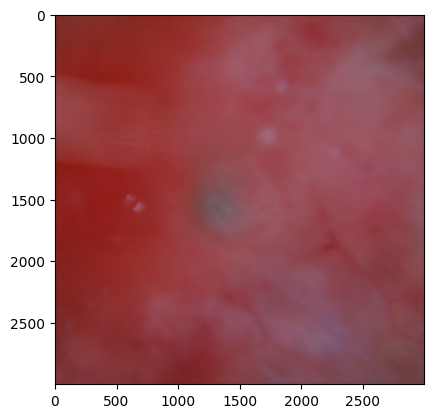

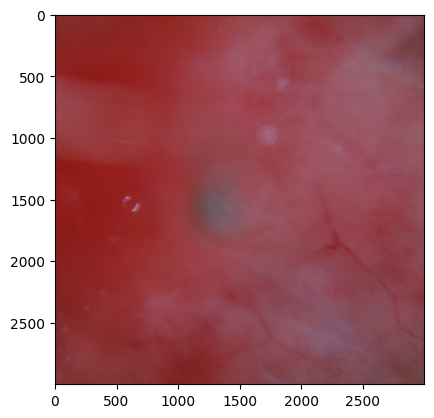

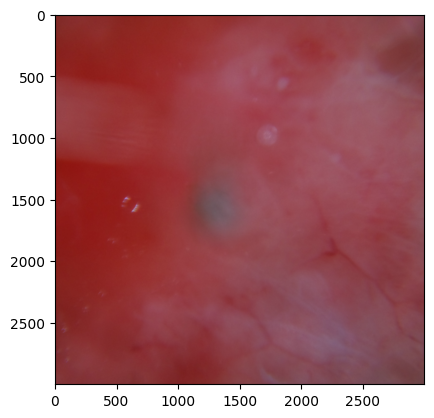

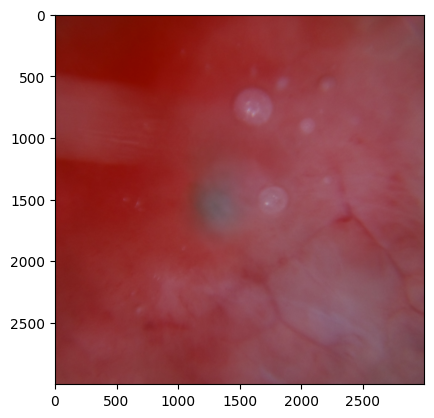

KeyboardInterrupt: ignored

In [ ]:

for img in imgs_good["image"]:
    device_image = img_to_array(Image.open(img))
    # correct
    if color_correct:
        img_avg = device_image.mean(axis=(0,1))
        device_image = np.clip(device_image +
                            np.expand_dims(avg_dv - img_avg, axis=0), 0, 255).astype(int)
    #plt.imshow(device_image)
    #plt.show()
    if center:
        device_image = device_image[1000:4000, 2000:5000]
    plt.imshow(device_image)
    plt.show()


In [ ]:
!ls -at

 HealNet_Pig_Device_Patches.ipynb
'Saved Weights'
 imgs_5.csv
 images_10.csv
 cropped_full_wound.zip
'Copy of HealNet_Pig_Device_Patches.ipynb'
 DenseNet_Classifier_Loss_Patch_Balanced_Corrected.pdf
 DenseNet_Classifier_Acc_Balanced_Corrected.pdf
 model.png
 logs
 TensorBlur
 near
 Pig_Labels_Cleaned_Jul10.csv
 data
 train_ctl.zip
 test_13.zip
 test_exp13_all_labels.csv
 training_control_labels.csv


In [ ]:
goods_df = pd.read_csv("good_images_less05.csv")

FileNotFoundError: ignored

In [ ]:
# get patch dict
#patches = glob.glob("/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_patch/train_ctl_patch/*.jpg")
patches = imgs_quad
count = []
pacount = {}
for patch in patches:
    p = patch.split("/")[-1]
    p = p.split("_")[:-2]
    p = "_".join(p)
    if p not in count:
        count.append(p)
    if p not in pacount:
        pacount[p] = [patch]
    else:
        pacount[p].append(patch)
print(len(count))
#1663 train

1707


# AB-MIL Patches

In [11]:
!ls data/Sep2_cleaned_control_images_Full_Image/

test_Exp_ctl_sep2_3x4_cleaned  train_ctl_sep2_3x4_cleaned


In [4]:
device_fns = glob.glob("data/Sep2_cleaned_control_images_Full_Image/test_Exp_ctl_sep2_3x4_cleaned/*.jpg", recursive=True)
#device_fns = glob.glob("data/exp_ctls/test_13/*.jpg", recursive=True)
print(len(device_fns))
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

509


In [5]:
avg_dv = np.array([108.16076384,  61.49104917,  55.44175686])
color_correct = False
center = False
clip_ = False
max_noise_level = 10000
stage_idx = {"Maturation":0,
             "Hemostasis":1,
             "Inflammatory":2,
             "Proliferation":3}
crop_size = 128
# blur_window_shape = (1000, 1332)
img_window_shape = (1000, 1000, 3)
#blur_window_shape = (256, 256)
#img_window_shape = (256, 256, 3)

In [9]:
!ls data

 abMIL_12_Train_sep2_cleaned   patch_healnet_arrays
 abMIL_12_val_sep2_cleaned    'Pig_Labels_Cleaned_FINALESTFINALLLL (1).gsheet'
 exp13_ctl_sep2		       Pig_Labels_Cleaned_FINALESTFINALLLL.csv
 exp_ctl_sep2_test.npy	       Pig_Labels_Cleaned_FINALESTFINALLLL.gsheet
 exp_ctl_sep2_train.npy        Sep2_cleaned_control_images_Full_Image
 iphone_train		       Sep2_cleaned_control_images_Patch_Image
 iphone_val		       train_ctl_sep2
 near			      'Wound Photos by iPhone'
'near_quad_tr=0.5'


In [8]:
!mkdir data/abMIL_12_val_sep2_cleaned

In [10]:
# 3x4 patchign corner patch
min_ = 999999999999
avg_ = np.array([0,0,0])
goods = 0
base = 'data/abMIL_12_val_sep2_cleaned'
num_ = len(device_fns)
num_patches = {}
count = 0
for fn in tqdm(device_fns):
    print(f"creating {fn.split('/')[-1]}...")
    # load
    device_image = img_to_array( Image.open(fn))
    #print(device_image.min(), device_image.max())
    if clip_:
        device_image = np.clip(device_image, 0, 255).astype(int)
    # correct
    if color_correct:
        img_avg = device_image.mean(axis=(0,1))
        device_image = np.clip(device_image +
                            np.expand_dims(avg_dv - img_avg, axis=0), 0, 255).astype(int)

    #print(device_image.shape)
    # Center Cropping
    if center:
        device_image = device_image[1000:4000, 1500:5500]

    #plt.imshow(device_image)
    #plt.show()
    #print(device_image.shape)

    I = view_as_blocks(device_image, block_shape=img_window_shape)

    h = len(I[:,0])
    w = len(I[0,:])
    goods = 0

    Path(base).mkdir(parents=True, exist_ok=True)
    #break
    ctr = 0
    for i in range(h):
        for j in range(w):

            max_y, max_x, _ = I[i,j][0].shape

            #plt.imshow(I[i,j][0])
            #plt.show()
            #print(device_image.shape)
            out_img = Image.fromarray(I[i,j][0].astype(np.uint8))

            out_img.save(base +"/" + fn.split('/')[-1].split('.')[0] + f'_{i}{j}_{str(ctr)}.jpg')
            #goods += 1
            #count += 1
            ctr += 1
            #print(i,j)

    print(f"{count}/{num_}: {ctr}  crops for image {fn}")
    if ctr == 0:
        print(f"{count}/{num_}: >>>>>>>>>>>>>>>>>>>> NO CROPS {fn} ")

    count += 1

  0%|          | 0/509 [00:00<?, ?it/s]

creating Exp_13_Wound_6_Day_4_2023-06-13-16-04-09.jpg...
0/509: 12  crops for image data/Sep2_cleaned_control_images_Full_Image/test_Exp_ctl_sep2_3x4_cleaned/Exp_13_Wound_6_Day_4_2023-06-13-16-04-09.jpg
creating Exp_13_Wound_6_Day_4_2023-06-13-20-15-59.jpg...
1/509: 12  crops for image data/Sep2_cleaned_control_images_Full_Image/test_Exp_ctl_sep2_3x4_cleaned/Exp_13_Wound_6_Day_4_2023-06-13-20-15-59.jpg
creating Exp_13_Wound_6_Day_4_2023-06-14-00-28-33.jpg...
2/509: 12  crops for image data/Sep2_cleaned_control_images_Full_Image/test_Exp_ctl_sep2_3x4_cleaned/Exp_13_Wound_6_Day_4_2023-06-14-00-28-33.jpg
creating Exp_13_Wound_6_Day_4_2023-06-13-09-46-51.jpg...
3/509: 12  crops for image data/Sep2_cleaned_control_images_Full_Image/test_Exp_ctl_sep2_3x4_cleaned/Exp_13_Wound_6_Day_4_2023-06-13-09-46-51.jpg
creating Exp_13_Wound_6_Day_4_2023-06-13-09-46-39.jpg...
4/509: 12  crops for image data/Sep2_cleaned_control_images_Full_Image/test_Exp_ctl_sep2_3x4_cleaned/Exp_13_Wound_6_Day_4_2023-06-1

In [ ]:
import glob
class MyDataset(Dataset):
    def __init__(self, image_paths, transform=None):

        self.image_paths = list(glob.glob(image_paths+"*.jpg", recursive=True))
        self.transform = transform
        print(self.image_paths[0:100])

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        x = Image.open(image_path)
        #y = self.get_class_label(image_path.split('/')[-1])
        if self.transform is not None:
            x = self.transform(x)
        return x

    def __len__(self):
        return len(self.image_paths)

def online_mean_and_sd(loader):
    """Compute the mean and sd in an online fashion

        Var[x] = E[X^2] - E^2[X]
    """
    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    for images in tqdm(loader):
        #print(images.shape)
        b, c, h, w = images.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2, dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)

        cnt += nb_pixels
        #print(fst_moment.cpu().tolist())
    return fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)

data_transforms = {
    'ext': transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor(),
    ])
}

import torchvision
train_dataset = MyDataset(image_paths='/content/abMIL_12_Train/abMIL_12_Train/',
                          transform=data_transforms['ext'])

loader_ = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

pig_mean, pig_std = online_mean_and_sd(loader_)
print(pig_mean, pig_std)